In [123]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# Data of Gender is converted into Binary Data
df_one = pd.get_dummies(df["Attrition"])
df_one

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
1465,1,0
1466,1,0
1467,1,0
1468,1,0


In [5]:
# Binary Data is Concatenated into Dataframe
df_two = pd.concat((df_one, df), axis=1)
 
 
# We want Male =0 and Female =1 So we drop Male column here
df_two = df_two.drop(["No"], axis=1)
df_Att = df_two.rename({"Yes":"Attrition_status"}, axis =1)

# Drop columns that are not useful
df_Att.drop(["EmployeeCount"], axis=1, inplace = True)
df_Att.drop(["Over18"], axis=1, inplace = True)
df_Att.drop(["StandardHours"], axis=1, inplace = True)
df_Att

,Attrition_status,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,3,1,0,8,0,1,6,4,0,5
1,0,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,4,4,1,10,3,3,10,7,1,7
2,1,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,0,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,3,3,0,8,3,3,8,7,3,0
4,0,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,...,3,3,1,17,3,3,5,2,0,3
1466,0,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,...,3,1,1,9,5,3,7,7,1,7
1467,0,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,...,4,2,1,6,0,3,6,2,0,3
1468,0,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,...,3,4,0,17,3,2,9,6,0,8


In [6]:
df_Att.drop(["EmployeeNumber"], axis=1, inplace = True)

In [7]:
df_Att

,Attrition_status,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,3,1,0,8,0,1,6,4,0,5
1,0,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,4,1,10,3,3,10,7,1,7
2,1,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,0,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,3,0,8,3,3,8,7,3,0
4,0,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,...,3,3,1,17,3,3,5,2,0,3
1466,0,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,...,3,1,1,9,5,3,7,7,1,7
1467,0,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,...,4,2,1,6,0,3,6,2,0,3
1468,0,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,...,3,4,0,17,3,2,9,6,0,8


In [8]:
corr_matrix = df_Att.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
# Decending order 
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

#first element of sol series is the pair with the biggest correlation


In [9]:
corrdf = sol.to_frame()
corrdf.rename(columns = {0:'Corr_coefficient'}, inplace = True)
corrdf.sort_values(by = "Corr_coefficient", ascending = False)

Corr_coefficient
JobLevel                 MonthlyIncome                 0.950300
                         TotalWorkingYears             0.782208
PercentSalaryHike        PerformanceRating             0.773550
MonthlyIncome            TotalWorkingYears             0.772893
YearsAtCompany           YearsWithCurrManager          0.769212
...                                                         ...
EnvironmentSatisfaction  JobLevel                      0.001212
TotalWorkingYears        WorkLifeBalance               0.001008
RelationshipSatisfaction YearsWithCurrManager          0.000867
JobSatisfaction          MonthlyRate                   0.000644
DailyRate                PerformanceRating             0.000473

[276 rows x 1 columns]

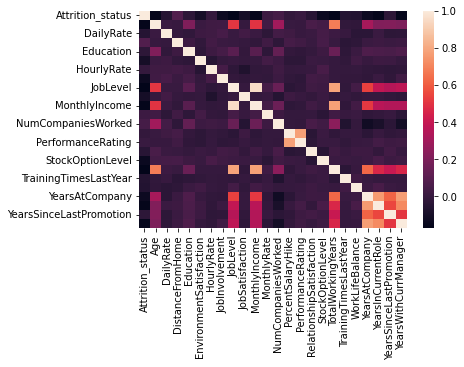

In [10]:

import matplotlib.pyplot as plt
sns.heatmap(df_Att.corr())

plt.savefig("Plotting_Correlation_HeatMap.jpg")

In [11]:
df_Att.drop(["JobLevel"], axis=1, inplace = True)
df_Att.drop(["Attrition"], axis=1, inplace = True)
df_Att

,Attrition_status,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,0,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,0,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,0,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [12]:
def Under30 (row):
    if row['Age'] < 30 :
        return "Under 30"
    else:
        return "Above 30"

In [13]:
df_Att["Below 30"] = df.apply(lambda row: Under30(row), axis=1)
df_Att

,Attrition_status,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Below 30
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,Above 30
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,Above 30
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,Above 30
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,Above 30
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,Under 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,1,17,3,3,5,2,0,3,Above 30
1466,0,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,1,9,5,3,7,7,1,7,Above 30
1467,0,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,1,6,0,3,6,2,0,3,Under 30
1468,0,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,0,17,3,2,9,6,0,8,Above 30


In [118]:
#define samples
group1 = df_Att[df_Att['Below 30']=='Under 30']
group2 = df_Att[df_Att['Below 30']=='Above 30']

#perform independent two sample t-test
ttest_ind(group1['Education'], group2['Education'])

Ttest_indResult(statistic=-10.184169019708971, pvalue=1.3892167625749712e-23)

In [120]:
contigency= pd.crosstab(df_Att['Education'], df_Att['Attrition_status'])
contigency

Attrition_status,0,1
Education,,
1,139,31
2,238,44
3,473,99
4,340,58
5,43,5


In [122]:
contigency_pct = pd.crosstab(df_Att['Education'], df_Att['Attrition_status'], normalize='index')
contigency_pct

Attrition_status,0,1
Education,,
1,0.817647,0.182353
2,0.843972,0.156028
3,0.826923,0.173077
4,0.854271,0.145729
5,0.895833,0.104167


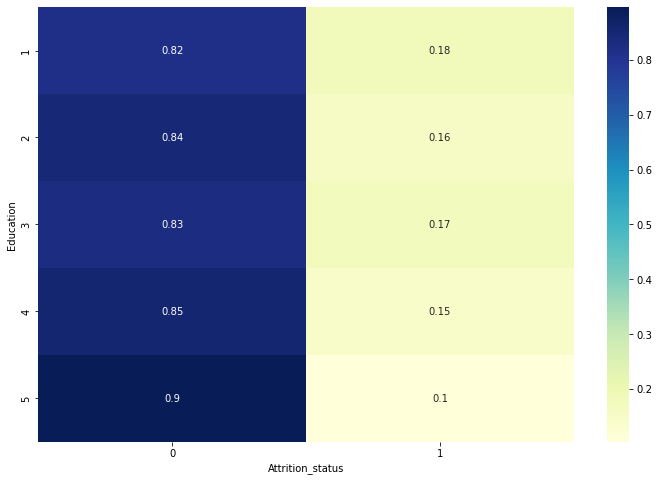

In [134]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")
#plt.savefig('Education_heatmap')

In [131]:
df_Att['bin_age'] = pd.qcut(df_Att['Age'], q=6, labels=[0,1,2,3,4,5])

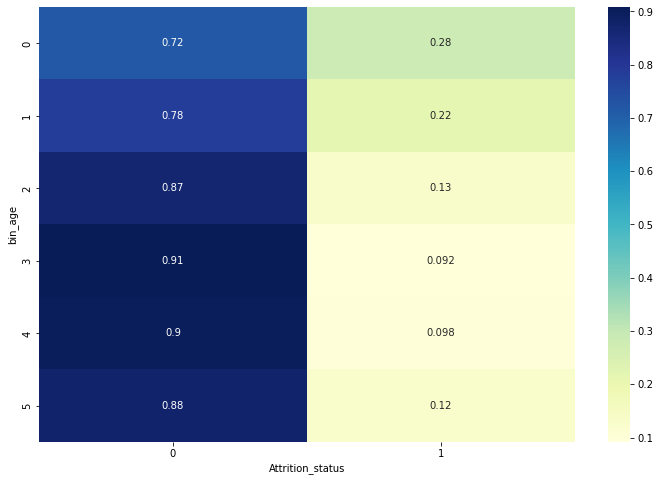

In [135]:
age_heat = pd.crosstab(df_Att['bin_age'], df_Att['Attrition_status'], normalize='index')
plt.figure(figsize=(12,8))
sns.heatmap(age_heat, annot=True, cmap="YlGnBu")
#plt.savefig('Age_heatmap')

In [114]:
df_Att["Age"].min()

18

In [97]:
Educationdf = pd.get_dummies(df_Att["Education"])

In [99]:
Below30df = pd.get_dummies(df_Att["Below 30"])

In [110]:
subedu30 = pd.concat([Educationdf, Below30df], axis=1)
subedu30


,1,2,3,4,5,Above 30,Under 30
0,0,1,0,0,0,1,0
1,1,0,0,0,0,1,0
2,0,1,0,0,0,1,0
3,0,0,0,1,0,1,0
4,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...
1465,0,1,0,0,0,1,0
1466,1,0,0,0,0,1,0
1467,0,0,1,0,0,0,1
1468,0,0,1,0,0,1,0


In [111]:
subedu30["UCollegeUnder30"] = subedu30[1]*subedu30["Under 30"]
subedu30["CollegeUnder30"] = subedu30[2]*subedu30["Under 30"]
subedu30["BachelorUnder30"] = subedu30[3]*subedu30["Under 30"]
subedu30["MasterUnder30"] = subedu30[4]*subedu30["Under 30"]
subedu30["DoctorUnder30"] = subedu30[5]*subedu30["Under 30"]
subedu30

,1,2,3,4,5,Above 30,Under 30,UCollegeUnder30,CollegeUnder30,BachelorUnder30,MasterUnder30,DoctorUnder30
0,0,1,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,0,1,0,0,0,0,0,0
1466,1,0,0,0,0,1,0,0,0,0,0,0
1467,0,0,1,0,0,0,1,0,0,1,0,0
1468,0,0,1,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

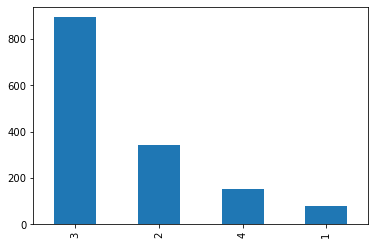

In [14]:
fig, ax = plt.subplots()
df_Att['WorkLifeBalance'].value_counts().plot(ax=ax, kind='bar')

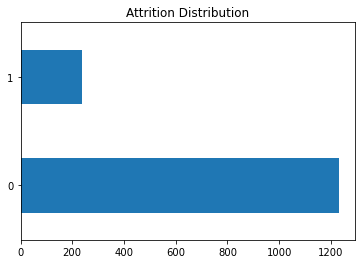

In [15]:

df_Att['Attrition_status'].value_counts().plot(kind='barh', title="Attrition Distribution")
savefig("Attrition Distribution.jpg")

In [115]:
df_Att['Below 30'].value_counts().plot(kind='bar', title="Age Distribution", color = "green")
for index, value in enumerate(list(df_Att["Below 30"])):
    plt.text(index, value, str(value))
plt.show()
#plt.savefig("Age Distribution.jpg")

ConversionError: Failed to convert value(s) to axis units: 'Above 30'

<Figure size 432x288 with 1 Axes>

In [17]:
# There are 23 numerical columns in the data, and 6 categorical data. 
df_Att.describe()

,Attrition_status,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# 1. build one linear bin and charts
# 2. Make a for loop
# use a stacked plot to include all the information. 

In [30]:
lineardf = pd.DataFrame()
lineardf["attrition"] = df_Att["Attrition_status"]
lineardf["age"] = df_Att["Age"]

In [31]:
lineardf["age"].max() - lineardf["age"].min()

42

In [32]:
lineardf['bin'] = pd.qcut(lineardf['age'], q=4, labels=[0,1,2,3])

In [33]:
import matplotlib.pyplot as plt

In [34]:
lineardf.sort_values(by = "age", ascending = False)

,attrition,age,bin
1209,0,60,3
427,0,60,3
536,0,60,3
411,0,60,3
879,0,60,3
...,...,...,...
972,0,18,0
457,1,18,0
828,1,18,0
1153,1,18,0


<AxesSubplot:xlabel='bin'>

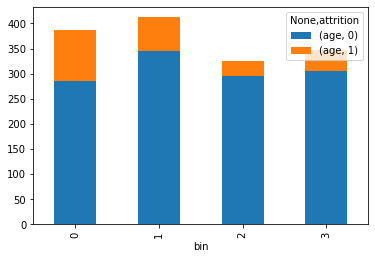

In [35]:
df_pivot = lineardf.groupby(['bin', 'attrition']).count().reset_index().pivot(columns=['attrition'], index='bin')
df_pivot.plot(kind='bar', stacked=True)

In [37]:
IndependOnlydf = df_Att.drop("Attrition_status", axis = 1)

In [41]:
#IndependOnlydf.columns
IndependOnlydf = IndependOnlydf.select_dtypes(include=np.number, exclude=None)

In [43]:
IndependOnlydf

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,4,5993,19479,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,5130,24907,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,3,2090,2396,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,3,2909,23159,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,2,3468,16632,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,4,2571,12290,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,1,9991,21457,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,6142,5174,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,5390,13243,...,3,4,0,17,3,2,9,6,0,8


In [95]:
from scipy.stats import ttest_ind

In [ ]:
#define samples
group1 = df[df['method']=='A']
group2 = df[df['method']=='B']

#perform independent two sample t-test
ttest_ind(group1['score'], group2['score'])

In [ ]:
for col in IndependOnlydf.columns:
    newdf = pd.DataFrame()
    newdf["attrition"] = df_Att['Attrition_status']
    newdf[col] = IndependOnlydf[col]
    newdf['bin'] = pd.qcut(newdf[col], q=5, duplicates = "drop")
    df_pivot = newdf.groupby(['bin', 'attrition']).count().reset_index().pivot(columns=['attrition'], index='bin')
    df_pivot.plot(kind='bar', stacked=True, title= col)
    #plt.savefig(col + '.jpg')




In [87]:
import cv2

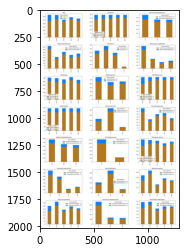

In [91]:
img = cv2.imread("Allplots.jpg")
# Displaying the image
plt.imshow(img)

numpy.ndarray